# **Project 4 Report**

Colton Morley

CS458


## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points:**

In [9]:
import numpy as np
np.random.seed(0)
X1 = np.random.randn(50,2)+[2,2]
X2 = np.random.randn(50,2)+[6,10]
X3 = np.random.randn(50,2)+[10,2]
X = np.concatenate((X1,X2,X3))

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot your Dendrogram using different linkage{“ward”, “complete”, “average”, “single”}.**

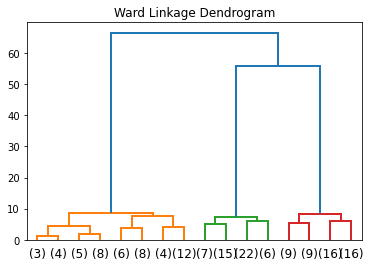

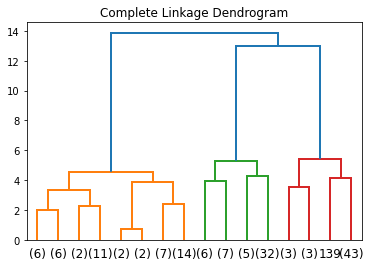

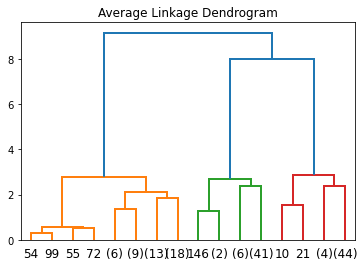

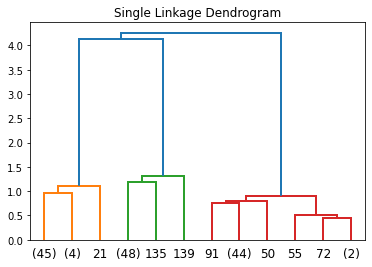

In [10]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
#Function to reduce repetition
def createDendrogram(link):
    model = AgglomerativeClustering(linkage = link, distance_threshold=0, n_clusters=None)
    model.fit(X)
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
        dendrogram(matrix, truncate_mode = "level", p=3)

#fig, ax = plt.subplots()


# Ward linkage
plt.title("Ward Linkage Dendrogram")
createDendrogram("ward")
plt.show()

# Complete Linkage
plt.title("Complete Linkage Dendrogram")
createDendrogram("complete")
plt.show()

# Average Linkage
plt.title("Average Linkage Dendrogram")
createDendrogram("average")
plt.show() 
# Single Linkage Dendrogram
plt.title("Single Linkage Dendrogram")
createDendrogram("single")
plt.show() 

## **P4-2. Clustering structured dataset**
**(a) Generate a swiss roll dataset:**

In [11]:
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import kneighbors_graph
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= .5

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a)**

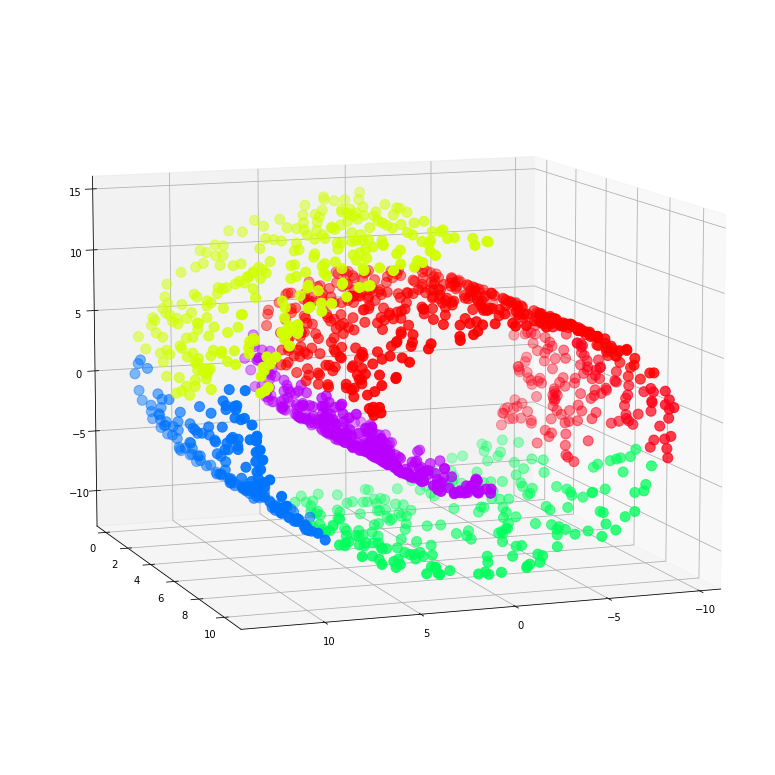

In [12]:
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(X)

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

x = np.array(X[:,0])
y = np.array(X[:,1])
z = np.array(X[:,2])
cluster = np.array(model.labels_)

ax.view_init(elev=10., azim=70)
ax.scatter(x,y,z, c = cluster, s = 100, cmap = plt.cm.hsv)
plt.show()


**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a).**

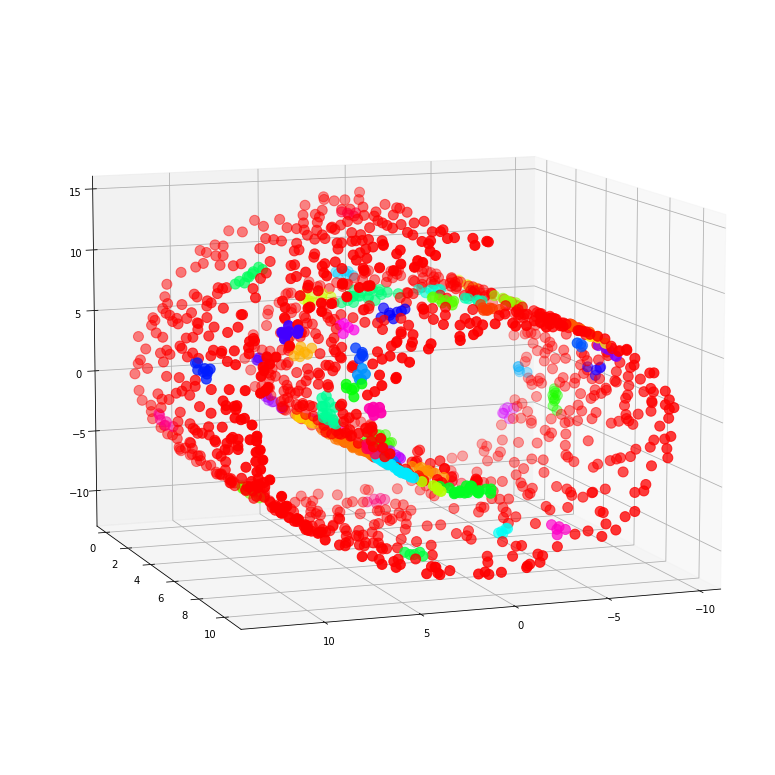

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples = 5, eps = .6)
model.fit(X)

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

cluster = np.array(model.labels_)

ax.view_init(elev=10., azim=70)
ax.scatter(x,y,z, c = cluster, s = 100, cmap = plt.cm.hsv)
plt.show()


Agglomerative clustering provides much cleaner results thatn DBSCAN when used with this data.  I believe this could be because of the ability to select exact number of clusters.  I have tried different parameters with DBSCAN and cannot yield any usefult results.  I also believe that this is because of the relatively consistent density throughout the Swiss Roll data.

## **P4-3. Clustering the handwritten digits data**
**(a) Use the following methods to cluster the data:**

In [14]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

digits = datasets.load_digits()
data = scale(digits.data)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target,test_size=0.2, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

clf = KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

y_pred = clf.predict(X_test)


print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred))) 
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))
cr = classification_report(y_test, y_pred)
print(cr)

# pca = PCA(n_components=2).fit(X_train)
# reduced_X_train = pca.transform(X_train)

# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# kmeans.fit(reduced_X_train, y_train)

# x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
# y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, Z)))
# print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, Z))) 
# print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, Z)))
# print ("Confusion matrix")
# print (metrics.confusion_matrix(y_test, Z))



Addjusted rand score:0.54
Homogeneity score:0.66 
Completeness score: 0.74 
Confusion matrix
[[ 0  0  0  0 32  1  0  0  0  0]
 [ 0 16  0  0  0  7  0  0  5  0]
 [ 0  4  1  0  0  1  0  0 27  0]
 [ 0  2 30  1  0  0  0  0  1  0]
 [ 4  0  0  0  0 40  1  1  0  0]
 [ 0  0 14 32  0  0  1  0  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [30  0  0  1  0  0  0  3  0  0]
 [ 1 21  7  1  0  0  0  0  0  0]
 [ 2  1 33  1  0  3  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.36      0.57      0.44        28
           2       0.01      0.03      0.02        33
           3       0.03      0.03      0.03        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.94      0.97      0.96        35
           7       0.75      0.09      0.16        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00  

In [15]:
from sklearn.cluster import DBSCAN

digits = datasets.load_digits()
data = scale(digits.data)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target,test_size=0.2, random_state=42)

clf = DBSCAN(eps = .4, min_samples=8, leaf_size = 25)

pred = clf.fit_predict(X_test)

cr = classification_report(y_test, pred)
print(cr)

precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00      33.0
           1       0.00      0.00      0.00      28.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      34.0
           4       0.00      0.00      0.00      46.0
           5       0.00      0.00      0.00      47.0
           6       0.00      0.00      0.00      35.0
           7       0.00      0.00      0.00      34.0
           8       0.00      0.00      0.00      30.0
           9       0.00      0.00      0.00      40.0

    accuracy                           0.00     360.0
   macro avg       0.00      0.00      0.00     360.0
weighted avg       0.00      0.00      0.00     360.0



Base on the methods, the KMeans clustering technically gives me better accuracy, but I have unfortunately been unable to get them to produce any meaningful results or accuracies.  I have tried different parameters and dimension reductions and have still had very poor results.